<img src='https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.enis.rnu.tn%2Fuseruploads%2Farticles_thumbs%2F515414061750_09_22_55.jpg&f=1&nofb=1' />

***
<h1><center> Machine Learning Project </center></h1>
<h2><center> Done By : </center></h2>
<h2><center> Ahmed Sakka & Ghassen Baklouti & Yassin Rebai </center></h2>

***
## Data Set :
In this project we chose to work with [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set in Kaggle.

***

### The Challenge :
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

***

## Tasks :
In this challenge, we are asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

We'll be trying to predict a classification- survival or deceased.

We'll use a "semi-cleaned" version of the titanic data set, but it needs more cleaning before working with it.

***

## Steps :
1. Exploring Cleaning the data set
2. Take a solution done by an expert and trying to understand it
3. Build defetrent models and test them using the data set:
    1. Logistic Regression
    2. Perceptron
    3. KNN
    4. SVM
    5. Decision Tree
    6. Random Forest
    7. Naive Bayes classifier
4. Conclusion

***

## 1. Exploring and Cleaning the data set :

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Our data set is already composed of two sets :
    1. Training Set
    2. Testing Set
We are going to explore and clean the Training Set, then we will do the same operations on the Testing Set for a faster data processing.

***

Reading the data set :

In [45]:
train = pd.read_csv('Titanic Data Set/titanic_train.csv')

In [65]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


### Variables Table

|variable|Defenition	|Key             |
|--------|--------------|----------------|
|survival|	Survival	|0 = No, 1 = Yes |
|pclass	 |Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex	 |Sex	        |                         |
|Age	 |Age in years	|                         |
|sibsp	 |# of siblings / spouses aboard the Titanic| |
|parch	 |# of parents / children aboard the Titanic| |
|ticket	 |Ticket number	| |
|fare	 |Passenger fare| |
|cabin	 |Cabin number  | |
|embarked|	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton|

***

Test if there is some missing data :

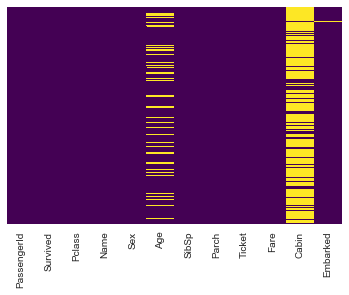

In [47]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

=> There are some missing data

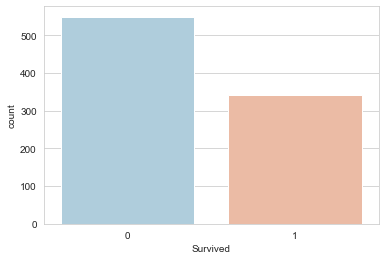

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

We can see that the numbers of survivals is less than the number of deaths.

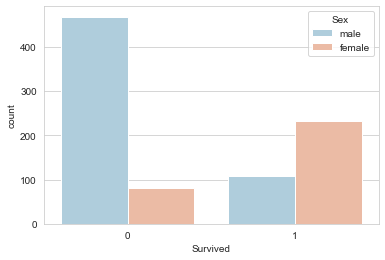

In [49]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

We can clearly see that female passengers have the highest number of survivals

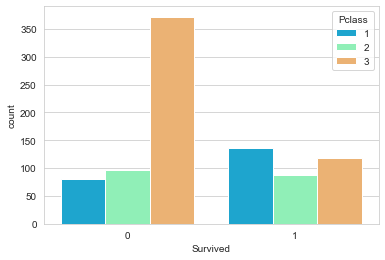

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

As the graph indicates, passangers in the 3rd class have the highest rate of deaths between the other classes. 

***

### Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).

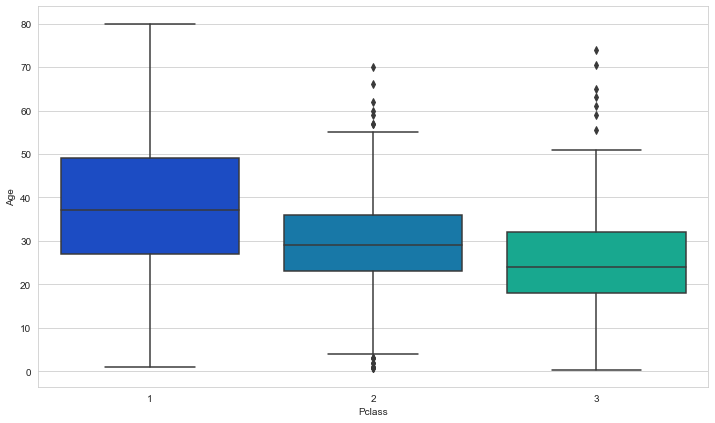

In [51]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

The mean age of passangers in class 1 is : 37  <br>
The mean age of passangers in class 2 is : 29  <br>
The mean age of passangers in class 3 is : 24  <br>

We'll use these average age values to impute based on Pclass for Age.

In [52]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now we apply the function to replace the null values

In [53]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

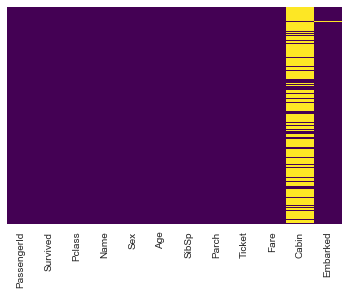

In [54]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we are going to drop the Cabin column (because most of its value are null, and it will not give us the needed information) and the row in Embarked that is NaN.

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train.drop('Cabin',axis=1,inplace=True)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [58]:
train.dropna(inplace=True)

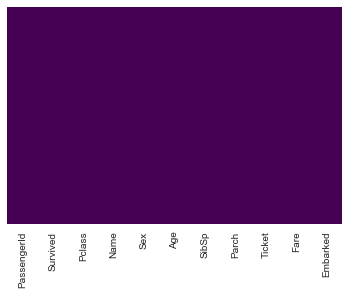

In [59]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We'll need now to convert categorical features to dummy variables using pandas, Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [61]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

We will drop the uncessary columns and change the old columns with the new converted dummy variables ones.
1. Sex:
    1. Male
    2. Female
2. Pclass:
    1. Class 1
    2. Class 2
    3. Class 3
3. Embarked:
    1. Q
    2. S
    3. C


In [62]:
train.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)

In [63]:
train = pd.concat([train,sex,embark,pclass],axis=1)

In [64]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


Now clean the Testing Set in the same way

In [67]:
test = pd.read_csv('Titanic Data Set/titanic_test.csv')
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
test.drop('Cabin',axis=1,inplace=True)
test.dropna(inplace=True)
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
pclass = pd.get_dummies(test['Pclass'],drop_first=True)
test.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)
test = pd.concat([train,sex,embark,pclass],axis=1)

In [68]:
test.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,1.0,0.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3.0,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Now our data set is all cleaned up and ready to be used